<Figure size 72000x72000 with 0 Axes>

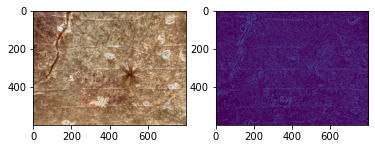

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# defining the crack detector function
   
# here weak_th and strong_th are thresholds for
# double thresholding step
def PCD(img, weak_th = None, strong_th = None):
      
    # conversion of image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.6)
       
    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
      
    # Conversion of Cartesian coordinates to polar 
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
       
    # setting the minimum and maximum thresholds 
    # for double thresholding
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image  
    height, width = img.shape
       
    # Looping through every pixel of the grayscale 
    # image
    for i_x in range(width):
        for i_y in range(height):
               
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
            # selecting the neighbours of the target pixel
            # according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
              
            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
               
            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)              
    ids = np.zeros_like(img)
       
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
              
            grad_mag = mag[i_y, i_x]
              
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
       
       
    # finally returning the magnitude of
    # gradients of edges
    return mag


   
frame = cv2.imread('01Test.jpg')
  
# calling the designed function for
# finding edges
# for potential cracks

crack_img = PCD(frame)

# Displaying the input and output image  
plt.figure(figsize=(1000,1000))
f, plots = plt.subplots(1, 2) 
plots[0].imshow(frame)
plots[1].imshow(crack_img)

error: OpenCV(4.5.5) D:\bld\libopencv_1641992799878\work\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# importing the necessary libraries
import cv2
import numpy as np
 
# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('sample.mp4')
 
 
# Loop until the end of the video
while (cap.isOpened()):
 
    # Capture frame-by-frame
    ret, frame = cap.read()
    frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0,
                         interpolation = cv2.INTER_CUBIC)
 
    # Display the resulting frame
    cv2.imshow('Frame', frame)
 
    # conversion of BGR to grayscale is necessary to apply this operation
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # adaptive thresholding to use different threshold
    # values on different regions of the frame.
    Thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                           cv2.THRESH_BINARY_INV, 11, 2)
 
    cv2.imshow('Thresh', Thresh)
    # define q as the exit button
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
 
# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()